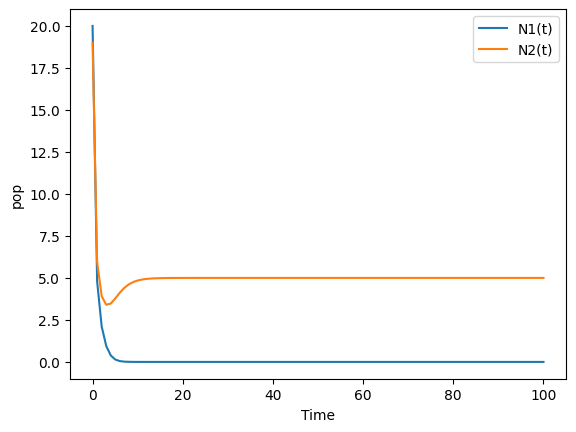

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation function
def dpop_dt(t, pop, birth_rate_1, birth_rate_2, homospecific_mating_preference_males_1, homospecific_mating_preference_males_2, viability_death_rate, competitive_effect_1_on_2, competitive_effect_2_on_1):
    N1, N2 = pop
    
    # Compute the rate of change of F1
    dN1 = (birth_rate_1 * N1 * (homospecific_mating_preference_males_1* N1) / (homospecific_mating_preference_males_1*N1 + (1 - homospecific_mating_preference_males_1)* N2)
           - viability_death_rate * N1
           - density_dependent_death_rate * N1 * (N1 + competitive_effect_1_on_2 * (N2))
           )
    

    dN2 = (birth_rate_2 * N2 * (homospecific_mating_preference_males_2* N2) / (homospecific_mating_preference_males_2*N2 + (1 - homospecific_mating_preference_males_1)* N1)
           - viability_death_rate * N2
           - density_dependent_death_rate * N2 * (N2 + competitive_effect_2_on_1 * (N1))
           )
    
    # Return the rate of change as a list
    return [dN1, dN2]  # Assuming M1, F2, M2 do not change; replace with their equations if they do

# Parameters (example values, replace with actual values)
birth_rate_1 = 1.5  #birth rate
birth_rate_2 = 1.5  #birth rate

viability_death_rate = 1
density_dependent_death_rate = 0.1

homospecific_mating_preference_males_1 = 0.5
homospecific_mating_preference_males_2 = 1

competitive_effect_1_on_2 = 0.2
competitive_effect_2_on_1 = 0.2

# Initial conditions
N1_0 = 20
N2_0 = 10
pop0 = [N1_0, N2_0]

# Time span
t_span = (0, 100)  # From t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODE
sol = solve_ivp(dpop_dt, t_span, pop0, args=(birth_rate_1, birth_rate_2, homospecific_mating_preference_males_1, homospecific_mating_preference_males_2, viability_death_rate, competitive_effect_1_on_2, competitive_effect_2_on_1), t_eval=t_eval)

# Plot the solution
plt.plot(sol.t, sol.y[0], label='N1(t)')
plt.plot(sol.t, sol.y[1], label='N2(t)')
plt.xlabel('Time')
plt.ylabel('pop')
plt.legend()
plt.show()


C:\Users\akila\AppData\Local\Temp\ipykernel_29528\763464931.py:35: RuntimeWarning: invalid value encountered in divide
  dN1 = (birth_rate_1 * N1 * (homospecific_mating_preference_males_1 * N1) / (homospecific_mating_preference_males_1 * N1 + (1 - homospecific_mating_preference_males_1) * N2)
C:\Users\akila\AppData\Local\Temp\ipykernel_29528\763464931.py:40: RuntimeWarning: invalid value encountered in divide
  dN2 = (birth_rate_2 * N2 * (homospecific_mating_preference_males_2 * N2) / (homospecific_mating_preference_males_2 * N2 + (1 - homospecific_mating_preference_males_1) * N1)
C:\Users\akila\AppData\Local\Temp\ipykernel_29528\763464931.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(N1, N2, dN1, levels=[0], colors='blue', label='dN1/dt = 0')
C:\Users\akila\AppData\Local\Temp\ipykernel_29528\763464931.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(N1, N2, dN2, levels=[0], colors='red', label='dN2/dt =

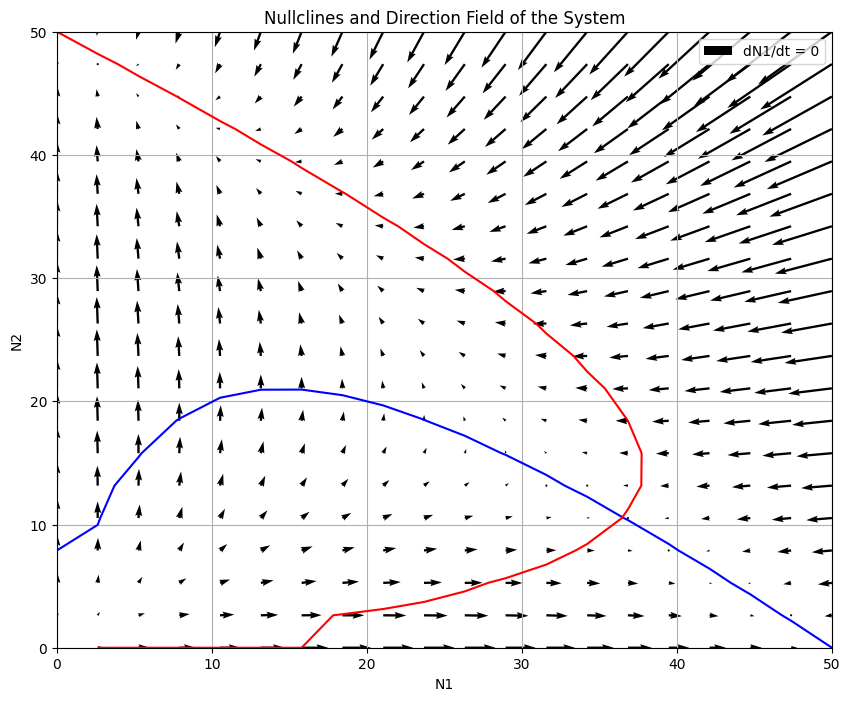

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def dpop_dt(t, pop, birth_rate_1, birth_rate_2, homospecific_mating_preference_males_1, homospecific_mating_preference_males_2, viability_death_rate, competitive_effect_1_on_2, competitive_effect_2_on_1, density_dependent_death_rate):
    N1, N2 = pop
    
    
    dN1 = (birth_rate_1 * N1 * (homospecific_mating_preference_males_1 * N1) / (homospecific_mating_preference_males_1 * N1 + (1 - homospecific_mating_preference_males_1) * N2)
           - viability_death_rate * N1
           - density_dependent_death_rate * N1 * (N1 + competitive_effect_1_on_2 * N2)
           )
    
    dN2 = (birth_rate_2 * N2 * (homospecific_mating_preference_males_2 * N2) / (homospecific_mating_preference_males_2 * N2 + (1 - homospecific_mating_preference_males_1) * N1)
           - viability_death_rate * N2
           - density_dependent_death_rate * N2 * (N2 + competitive_effect_2_on_1 * N1)
           )
    
    return [dN1, dN2]

# Parameters
birth_rate_1 = 6
birth_rate_2 = 6
viability_death_rate = 1
density_dependent_death_rate = 0.1
homospecific_mating_preference_males_1 = 0.5
homospecific_mating_preference_males_2 = 0.9
competitive_effect_1_on_2 = 0
competitive_effect_2_on_1 = 0

# Grid for N1 and N2
N1_vals = np.linspace(0, 50, 20)
N2_vals = np.linspace(0, 50, 20)
N1, N2 = np.meshgrid(N1_vals, N2_vals)

# Compute dN1 and dN2 on the grid
dN1 = (birth_rate_1 * N1 * (homospecific_mating_preference_males_1 * N1) / (homospecific_mating_preference_males_1 * N1 + (1 - homospecific_mating_preference_males_1) * N2)
       - viability_death_rate * N1
       - density_dependent_death_rate * N1 * (N1 + competitive_effect_1_on_2 * N2)
       )

dN2 = (birth_rate_2 * N2 * (homospecific_mating_preference_males_2 * N2) / (homospecific_mating_preference_males_2 * N2 + (1 - homospecific_mating_preference_males_1) * N1)
       - viability_death_rate * N2
       - density_dependent_death_rate * N2 * (N2 + competitive_effect_2_on_1 * N1)
       )

# Plotting nullclines and direction field
plt.figure(figsize=(10, 8))
plt.contour(N1, N2, dN1, levels=[0], colors='blue', label='dN1/dt = 0')
plt.contour(N1, N2, dN2, levels=[0], colors='red', label='dN2/dt = 0')

# Calculate the direction field
N1_vals_fine = np.linspace(0, 50, 20)
N2_vals_fine = np.linspace(0, 50, 20)
N1_fine, N2_fine = np.meshgrid(N1_vals_fine, N2_vals_fine)
dN1_fine, dN2_fine = np.zeros(N1_fine.shape), np.zeros(N2_fine.shape)

for i in range(N1_fine.shape[0]):
    for j in range(N1_fine.shape[1]):
        dN1_fine[i, j], dN2_fine[i, j] = dpop_dt(0, [N1_fine[i, j], N2_fine[i, j]], birth_rate_1, birth_rate_2, homospecific_mating_preference_males_1, homospecific_mating_preference_males_2, viability_death_rate, competitive_effect_1_on_2, competitive_effect_2_on_1, density_dependent_death_rate)

plt.quiver(N1_fine, N2_fine, dN1_fine, dN2_fine, color='black')

plt.xlabel('N1')
plt.ylabel('N2')
plt.title('Nullclines and Direction Field of the System')
plt.legend(['dN1/dt = 0', 'dN2/dt = 0'])
plt.grid(True)
plt.show()


C:\Users\akila\AppData\Local\Temp\ipykernel_29528\2973158613.py:34: RuntimeWarning: invalid value encountered in divide
  dN1 = (birth_rate_1 * N1 * (homospecific_mating_preference_males_1 * N1) / (homospecific_mating_preference_males_1 * N1 + (1 - homospecific_mating_preference_males_1) * N2)
C:\Users\akila\AppData\Local\Temp\ipykernel_29528\2973158613.py:39: RuntimeWarning: invalid value encountered in divide
  dN2 = (birth_rate_2 * N2 * (homospecific_mating_preference_males_2 * N2) / (homospecific_mating_preference_males_2 * N2 + (1 - homospecific_mating_preference_males_1) * N1)
C:\Users\akila\AppData\Local\Temp\ipykernel_29528\2973158613.py:46: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(N1, N2, dN1, levels=[0], colors='blue', label='dN1/dt = 0')
C:\Users\akila\AppData\Local\Temp\ipykernel_29528\2973158613.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(N1, N2, dN2, levels=[0], colors='red', label='dN2/

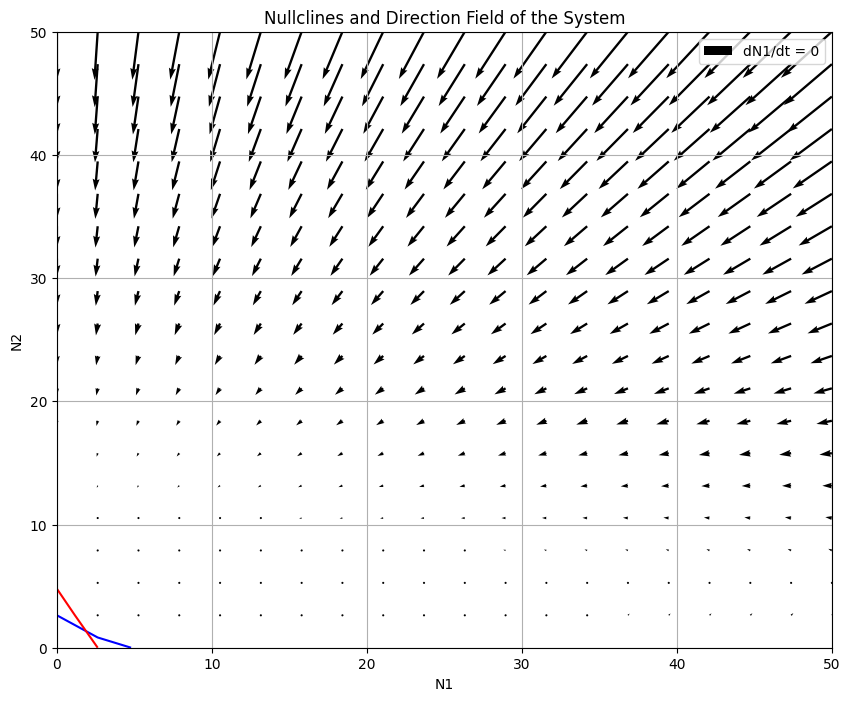

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def dpop_dt(t, pop, birth_rate_1, birth_rate_2, homospecific_mating_preference_males_1, homospecific_mating_preference_males_2, viability_death_rate, competitive_effect_1_on_2, competitive_effect_2_on_1, density_dependent_death_rate):
    N1, N2 = pop
    
    
    dN1 = ((birth_rate_1 * N1 * N1) / (N1 + (reproductive_interference_2_on_1) * N2)
           - viability_death_rate * N1
           - density_dependent_death_rate * N1 *  N2
           )
    
    dN2 = ((birth_rate_2 * N2 * N2) / N2 + (reproductive_interference_1_on_2 * N1)
           - viability_death_rate * N2
           - density_dependent_death_rate * N2 * N2
           )
    
    return [dN1, dN2]

# Parameters
birth_rate_1 = 1.5
birth_rate_2 = 1.5
viability_death_rate = 1
density_dependent_death_rate = 0.1
reproductive_interference_2_on_1 = 0.2
reproductive_interference_1_on_2 = 0.2

# Grid for N1 and N2
N1_vals = np.linspace(0, 50, 20)
N2_vals = np.linspace(0, 50, 20)
N1, N2 = np.meshgrid(N1_vals, N2_vals)

# Compute dN1 and dN2 on the grid
dN1 = (birth_rate_1 * N1 * (homospecific_mating_preference_males_1 * N1) / (homospecific_mating_preference_males_1 * N1 + (1 - homospecific_mating_preference_males_1) * N2)
       - viability_death_rate * N1
       - density_dependent_death_rate * N1 * (N1 + competitive_effect_1_on_2 * N2)
       )

dN2 = (birth_rate_2 * N2 * (homospecific_mating_preference_males_2 * N2) / (homospecific_mating_preference_males_2 * N2 + (1 - homospecific_mating_preference_males_1) * N1)
       - viability_death_rate * N2
       - density_dependent_death_rate * N2 * (N2 + competitive_effect_2_on_1 * N1)
       )

# Plotting nullclines and direction field
plt.figure(figsize=(10, 8))
plt.contour(N1, N2, dN1, levels=[0], colors='blue', label='dN1/dt = 0')
plt.contour(N1, N2, dN2, levels=[0], colors='red', label='dN2/dt = 0')

# Calculate the direction field
N1_vals_fine = np.linspace(0, 50, 20)
N2_vals_fine = np.linspace(0, 50, 20)
N1_fine, N2_fine = np.meshgrid(N1_vals_fine, N2_vals_fine)
dN1_fine, dN2_fine = np.zeros(N1_fine.shape), np.zeros(N2_fine.shape)

for i in range(N1_fine.shape[0]):
    for j in range(N1_fine.shape[1]):
        dN1_fine[i, j], dN2_fine[i, j] = dpop_dt(0, [N1_fine[i, j], N2_fine[i, j]], birth_rate_1, birth_rate_2, homospecific_mating_preference_males_1, homospecific_mating_preference_males_2, viability_death_rate, competitive_effect_1_on_2, competitive_effect_2_on_1, density_dependent_death_rate)

plt.quiver(N1_fine, N2_fine, dN1_fine, dN2_fine, color='black')

plt.xlabel('N1')
plt.ylabel('N2')
plt.title('Nullclines and Direction Field of the System')
plt.legend(['dN1/dt = 0', 'dN2/dt = 0'])
plt.grid(True)
plt.show()
